<a href="https://colab.research.google.com/github/aaryans99/CS-6375-Machine-Learning/blob/main/Assignment%202%5CAssignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6375 ML - Assignment 2**

Aaryan Singh - axc230019

Nikunj Gohil - ndg220000

---



**Neural Networks**

---

Dataset Information

> The inputs are as follows\
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)\
X2=the house age (unit: year)\
X3=the distance to the nearest MRT station (unit: meter)\
X4=the number of convenience stores in the living circle on foot (integer)\
X5=the geographic coordinate, latitude. (unit: degree)\
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

1. Importing Libraries






In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

2. Importing Dataset and Preprocessing

In [5]:
url = 'https://github.com/aaryans99/CS-6375-Machine-Learning/raw/main/Real%20estate%20valuation%20data%20set.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
# check for null values
df.isna().sum()
# remove unwanted column
df = df.drop(columns=["No"], axis=1)

In [7]:
# Convert TWD per Ping to USD per square meter
exchange_rate_TWD_to_USD = 0.031
ping_to_square_meter = 3.3
df['Y house price of unit area'] = (df['Y house price of unit area'] * exchange_rate_TWD_to_USD) / ping_to_square_meter

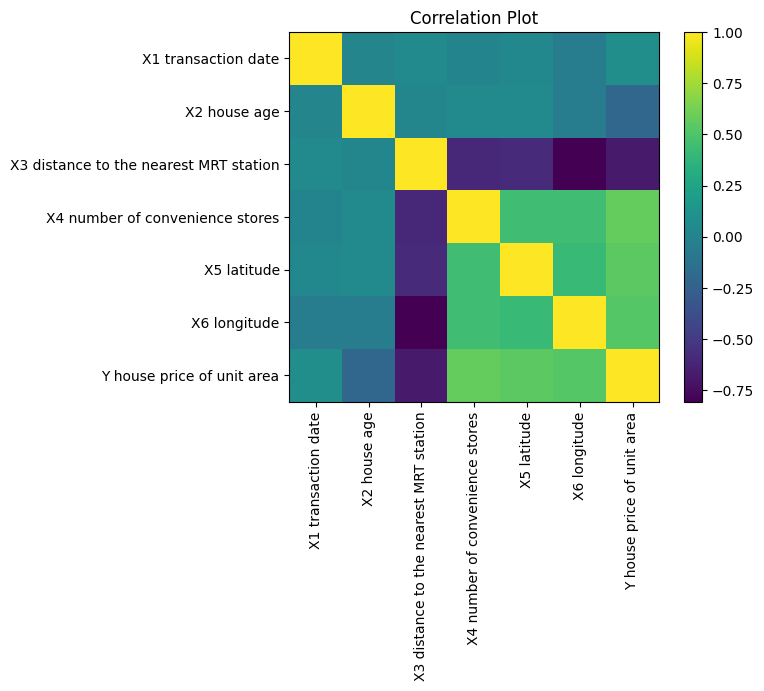

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
#Heat Map
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Plot')
plt.show()
M=corr_matrix
M

In [9]:
#Standardizing the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

2.   Splitting Data



In [10]:
Y = scaled_df['Y house price of unit area']
X = scaled_df[['X1 transaction date', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
scaled_df.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Set:")
print(np.shape(X_train))
print(np.shape(Y_train))
print("\nTesting Set:")
print(np.shape(X_test))
print(np.shape(Y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB
Training Set:
(331, 4)
(331,)

Testing Set:
(83, 4)
(83,)


3. Neural Net Creation
*   Sigmoid Function




In [11]:
#Helper Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# derivative of sigmoid
# sigmoid(y) * (1.0 - sigmoid(y))
# the way we use this y is already sigmoided
def sigmoid_derivative(y):
    return y * (1.0 - y)

In [20]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4)
        self.weights2   = np.random.rand(4,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [13]:
nn = NeuralNetwork(X_train,Y_train)

In [21]:
#epochs
for i in range(1000):
    nn.feedforward()
    nn.backprop()

ValueError: ignored